In [1]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# SET WORK DERC

#### For my Mac
# os.chdir('//Users//patricklee//Desktop//파이썬//DACON//2020DACON_CUP') 

### For my Desktop
os.chdir('C://Users//BIS_COM//data//dacon//2020')

In [2]:
train_df = pd.read_csv(r'./train.csv',encoding='cp949',parse_dates=['DateTime'])
login_df = pd.read_csv(r'./info_login.csv',parse_dates=['c_time'],index_col=0)
user_df = pd.read_csv(r'./info_user.csv',parse_dates=['c_time'],index_col=0)
compe_df = pd.read_csv(r'./info_competition.csv',encoding='cp949',parse_dates=['period_start','period_end'],index_col=0)
sub_df = pd.read_csv(r'./info_submission.csv',encoding='cp949',index_col=0,parse_dates=['c_time'])

C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data = [train_df,login_df,user_df,compe_df,sub_df]
just_data = [login_df,user_df,compe_df]
user_data = [user_df,login_df]

In [4]:
for i in all_data :
    print('-'*50)
    i.info()

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  19008 non-null  datetime64[ns]
 1   사용자       19008 non-null  int64         
 2   세션        19008 non-null  int64         
 3   신규방문자     19008 non-null  int64         
 4   페이지뷰      19008 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 742.6 KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Float64Index: 151428 entries, 0.0 to nan
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   login_id  148999 non-null  float64       
 1   user_id   141585 non-null  float64       
 2   c_time    148999 non-null  datetime64[ns]
 3   platform  64654 non-null   object        
 4   browser   6

In [5]:
login_df['c_time'] = login_df['c_time'].dt.date
user_df['c_time'] = user_df['c_time'].dt.date
compe_df['period_start'] = compe_df['period_start'].dt.date
compe_df['period_end'] = compe_df['period_end'].dt.date
train_df['DateTime'] = train_df['DateTime'].dt.date

In [6]:
train_df

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,19,19,8,206
1,2018-09-09,20,19,9,259
2,2018-09-09,12,9,1,48
3,2018-09-09,10,10,2,102
4,2018-09-09,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08,124,123,19,3128
19004,2020-11-08,166,159,29,4864
19005,2020-11-08,184,173,32,3426
19006,2020-11-08,163,155,34,2845


# User Data Reshape

In [7]:
user_df.sort_values(by='c_time',axis=0)
user_df

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0.0,15994.0,2017-05-02,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
user_df.isnull().sum()

id                         411
c_time                     411
entered_competition_cnt    411
code_share_cnt             411
talk_board_cnt             411
country_code               411
python_level               411
ds_level                   411
dtype: int64

In [9]:
user_df.shape

(22103, 8)

In [10]:
user_df = user_df.dropna(axis=0, how='any')

In [11]:
user_df.shape

(21692, 8)

In [12]:
22103 - 21692

411

In [13]:
user_df.isnull().sum()

id                         0
c_time                     0
entered_competition_cnt    0
code_share_cnt             0
talk_board_cnt             0
country_code               0
python_level               0
ds_level                   0
dtype: int64

# Login Data reshape

In [14]:
login_df.isnull().sum()

login_id     2429
user_id      9843
c_time       2429
platform    86774
browser     86774
dtype: int64

In [15]:
login_df.sort_values('c_time')

,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23,Windows 8,Internet Explorer 10.0
20.0,14322.0,19221.0,2018-09-23,Windows,Chrome 69.0.3497.100
21.0,14323.0,9771.0,2018-09-23,Apple,Chrome 69.0.3497.100
22.0,14338.0,91.0,2018-09-23,Apple,Safari 12.0
23.0,14346.0,17298.0,2018-09-23,Windows,Chrome 68.0.3440.106
...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
login_drop_df = login_df.copy()
# login_drop_df['c_time'] = login_drop_df['c_time'].dropna
# login_drop_df.head()

In [17]:
login_drop_df=login_drop_df.dropna(how='all')
login_drop_df.head()

,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23,Windows 8,Internet Explorer 10.0
1.0,14234.0,22045.0,2018-09-23,Windows,Chrome 67.0.3396.99
2.0,14256.0,8790.0,2018-09-23,Windows,Chrome 69.0.3497.100
3.0,14278.0,NaN,2018-09-23,Windows,Chrome 69.0.3497.100
4.0,14279.0,NaN,2018-09-23,Windows,Chrome 69.0.3497.100


In [18]:
login_drop_df.isnull().sum()

login_id        0
user_id      7414
c_time          0
platform    84345
browser     84345
dtype: int64

In [19]:
login_drop_df['user_id'] = login_drop_df['user_id'].fillna(-99)
login_drop_df['platform'] = login_drop_df['platform'].fillna('Other')
login_drop_df['browser'] = login_drop_df['browser'].fillna('Other')

In [20]:
login_drop_df.isnull().sum()

login_id    0
user_id     0
c_time      0
platform    0
browser     0
dtype: int64

In [21]:
login_drop_df.head()

,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23,Windows 8,Internet Explorer 10.0
1.0,14234.0,22045.0,2018-09-23,Windows,Chrome 67.0.3396.99
2.0,14256.0,8790.0,2018-09-23,Windows,Chrome 69.0.3497.100
3.0,14278.0,-99.0,2018-09-23,Windows,Chrome 69.0.3497.100
4.0,14279.0,-99.0,2018-09-23,Windows,Chrome 69.0.3497.100


# New Data Tabel

In [22]:
user_df.columns

Index(['id', 'c_time', 'entered_competition_cnt', 'code_share_cnt',
       'talk_board_cnt', 'country_code', 'python_level', 'ds_level'],
      dtype='object')

In [23]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21692 entries, 0.0 to 21691.0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21692 non-null  float64
 1   c_time                   21692 non-null  object 
 2   entered_competition_cnt  21692 non-null  float64
 3   code_share_cnt           21692 non-null  float64
 4   talk_board_cnt           21692 non-null  float64
 5   country_code             21692 non-null  float64
 6   python_level             21692 non-null  float64
 7   ds_level                 21692 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.5+ MB


In [24]:
user_df['c_time'] = pd.to_datetime(user_df['c_time'])
user_df['c_time'] = user_df['c_time'].dt.date

<ipython-input-24-7968f3b8cbd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['c_time'] = pd.to_datetime(user_df['c_time'])
<ipython-input-24-7968f3b8cbd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['c_time'] = user_df['c_time'].dt.date


In [25]:
pv_user_df1 = pd.pivot_table(user_df, index='c_time',values=['id'],aggfunc='count')

In [26]:
pv_user_df1

,id
c_time,
2017-05-02,1
2018-08-08,6
2018-08-09,1
2018-08-10,2
2018-08-12,1
...,...
2020-12-04,42
2020-12-05,31
2020-12-06,24


In [27]:
pv_user_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 2017-05-02 to 2020-12-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      843 non-null    int64
dtypes: int64(1)
memory usage: 13.2+ KB


In [28]:
pv_user_df2 = pd.pivot_table(user_df, index='c_time',values=['ds_level'],aggfunc='mean')

In [29]:
pv_user_df2

,ds_level
c_time,
2017-05-02,1.0
2018-08-08,1.0
2018-08-09,1.0
2018-08-10,1.0
2018-08-12,1.0
...,...
2020-12-04,1.0
2020-12-05,1.0
2020-12-06,1.0


In [30]:
pv_user_df3 = pd.pivot_table(user_df, index='c_time',values=['country_code'],aggfunc='nunique')

In [31]:
pv_user_df3

,c_time,country_code
c_time,,
2017-05-02,1,1
2018-08-08,1,1
2018-08-09,1,1
2018-08-10,1,1
2018-08-12,1,1
...,...,...
2020-12-04,1,2
2020-12-05,1,1
2020-12-06,1,1


In [32]:
pv_user_df3=pv_user_df3.drop(axis=1,columns='c_time')

In [33]:
new_user_df = pd.merge(pv_user_df1, pv_user_df2, how='outer',on='c_time')

In [34]:
new_user_df

,id,ds_level
c_time,,
2017-05-02,1,1.0
2018-08-08,6,1.0
2018-08-09,1,1.0
2018-08-10,2,1.0
2018-08-12,1,1.0
...,...,...
2020-12-04,42,1.0
2020-12-05,31,1.0
2020-12-06,24,1.0


In [35]:
new_user_df = pd.merge(new_user_df, pv_user_df3, how='outer',on='c_time')

In [36]:
new_user_df

,id,ds_level,country_code
c_time,,,
2017-05-02,1,1.0,1
2018-08-08,6,1.0,1
2018-08-09,1,1.0,1
2018-08-10,2,1.0,1
2018-08-12,1,1.0,1
...,...,...,...
2020-12-04,42,1.0,2
2020-12-05,31,1.0,1
2020-12-06,24,1.0,1


### login data new values

In [37]:
login_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 148999 entries, 0.0 to 148998.0
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   login_id  148999 non-null  float64
 1   user_id   148999 non-null  float64
 2   c_time    148999 non-null  object 
 3   platform  148999 non-null  object 
 4   browser   148999 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.8+ MB


In [38]:
pv_user_df1 = pd.pivot_table(login_drop_df, index='c_time',values=['user_id'],aggfunc='count')

In [39]:
pv_user_df1

,user_id
c_time,
2018-09-23,35
2018-09-24,30
2018-09-25,18
2018-09-26,48
2018-09-27,31
...,...
2020-12-04,276
2020-12-05,143
2020-12-06,169


In [40]:
pv_user_df2 = pd.pivot_table(login_drop_df, index='c_time',values=['platform','browser','user_id'],aggfunc='nunique')
pv_user_df2

,browser,c_time,platform,user_id
c_time,,,,
2018-09-23,11,1,6,19
2018-09-24,12,1,5,22
2018-09-25,6,1,2,14
2018-09-26,10,1,5,31
2018-09-27,9,1,3,24
...,...,...,...,...
2020-12-04,1,1,1,228
2020-12-05,1,1,1,129
2020-12-06,1,1,1,148


In [41]:
pv_user_df2 = pv_user_df2.drop(axis=1, columns='c_time')

In [42]:
new_login_df = pd.merge(pv_user_df1, pv_user_df2, how='outer',on='c_time')
new_login_df.tail()

,user_id_x,browser,platform,user_id_y
c_time,,,,
2020-12-04,276,1,1,228
2020-12-05,143,1,1,129
2020-12-06,169,1,1,148
2020-12-07,345,1,1,280
2020-12-08,299,1,1,266


In [43]:
new_login_df=new_login_df.rename({'user_id_x':'Total visit', 'user_id_y':'Total User'},axis='columns')

In [44]:
new_login_df

,Total visit,browser,platform,Total User
c_time,,,,
2018-09-23,35,11,6,19
2018-09-24,30,12,5,22
2018-09-25,18,6,2,14
2018-09-26,48,10,5,31
2018-09-27,31,9,3,24
...,...,...,...,...
2020-12-04,276,1,1,228
2020-12-05,143,1,1,129
2020-12-06,169,1,1,148


In [45]:
new_value_df = pd.merge(new_user_df, new_login_df, how='outer',on='c_time')

In [46]:
new_value_df

,id,ds_level,country_code,Total visit,browser,platform,Total User
c_time,,,,,,,
2017-05-02,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-08,6.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-09,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-10,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-12,1.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-11-03,NaN,NaN,NaN,19.0,8.0,5.0,14.0
2018-11-07,NaN,NaN,NaN,43.0,9.0,7.0,20.0
2019-04-06,NaN,NaN,NaN,36.0,10.0,6.0,26.0


# Missing Value

In [47]:
new_value_df = new_value_df.fillna(-99)

In [48]:
new_value_df

,id,ds_level,country_code,Total visit,browser,platform,Total User
c_time,,,,,,,
2017-05-02,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-08,6.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-09,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-10,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-12,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...
2018-11-03,-99.0,-99.0,-99.0,19.0,8.0,5.0,14.0
2018-11-07,-99.0,-99.0,-99.0,43.0,9.0,7.0,20.0
2019-04-06,-99.0,-99.0,-99.0,36.0,10.0,6.0,26.0


In [49]:
train_df=train_df.rename({'DateTime':'c_time'},axis='columns')

In [50]:
train_df

,c_time,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,19,19,8,206
1,2018-09-09,20,19,9,259
2,2018-09-09,12,9,1,48
3,2018-09-09,10,10,2,102
4,2018-09-09,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08,124,123,19,3128
19004,2020-11-08,166,159,29,4864
19005,2020-11-08,184,173,32,3426
19006,2020-11-08,163,155,34,2845


In [51]:
train = pd.merge(new_value_df, train_df,how="outer",on="c_time")

In [52]:
train = train.fillna(0)

In [53]:
train

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
0,2017-05-02,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0
1,2018-08-08,6.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0
2,2018-08-09,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0
3,2018-08-10,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0
4,2018-08-12,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19065,2019-04-20,-99.0,-99.0,-99.0,18.0,10.0,6.0,12.0,3.0,3.0,0.0,34.0
19066,2019-04-20,-99.0,-99.0,-99.0,18.0,10.0,6.0,12.0,3.0,3.0,1.0,44.0
19067,2019-04-20,-99.0,-99.0,-99.0,18.0,10.0,6.0,12.0,7.0,7.0,2.0,26.0
19068,2019-04-20,-99.0,-99.0,-99.0,18.0,10.0,6.0,12.0,7.0,7.0,1.0,74.0


In [54]:
train=train.sort_values(by='c_time') # 19040
train.iloc[19039:]

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
18756,2020-11-08,36.0,1.0,1.0,224.0,1.0,1.0,182.0,17.0,18.0,1.0,148.0
18776,2020-11-09,162.0,1.0,1.0,460.0,1.0,1.0,399.0,0.0,0.0,0.0,0.0
18777,2020-11-10,75.0,1.0,1.0,356.0,1.0,1.0,316.0,0.0,0.0,0.0,0.0
18778,2020-11-11,86.0,1.0,4.0,504.0,1.0,1.0,399.0,0.0,0.0,0.0,0.0
18779,2020-11-12,61.0,1.0,1.0,394.0,1.0,1.0,334.0,0.0,0.0,0.0,0.0
18780,2020-11-13,74.0,1.0,2.0,397.0,1.0,1.0,332.0,0.0,0.0,0.0,0.0
18781,2020-11-14,31.0,1.0,3.0,222.0,1.0,1.0,185.0,0.0,0.0,0.0,0.0
18782,2020-11-15,50.0,1.0,1.0,296.0,1.0,1.0,256.0,0.0,0.0,0.0,0.0
18783,2020-11-16,76.0,1.0,1.0,600.0,1.0,1.0,469.0,0.0,0.0,0.0,0.0
18784,2020-11-17,67.0,1.0,1.0,430.0,1.0,1.0,365.0,0.0,0.0,0.0,0.0


# Model

In [55]:
train['c_time'] = pd.to_datetime(train['c_time'])
train.set_index('c_time', inplace= True)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19070 entries, 2017-05-02 to 2020-12-08
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19070 non-null  float64
 1   ds_level      19070 non-null  float64
 2   country_code  19070 non-null  float64
 3   Total visit   19070 non-null  float64
 4   browser       19070 non-null  float64
 5   platform      19070 non-null  float64
 6   Total User    19070 non-null  float64
 7   사용자           19070 non-null  float64
 8   세션            19070 non-null  float64
 9   신규방문자         19070 non-null  float64
 10  페이지뷰          19070 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [57]:
# train_set = train[:'2020-11-09'].iloc[:,:].values

In [58]:
# x_train = train[:'2020-11-09'].iloc[:,:7].values
# y_train = train[:'2020-11-09'].iloc[:,7:].values

# x_test = train['2020-11-09':].iloc[:,:7].values
# y_test = train['2020-11-09':].iloc[:,7:].values

# print(x_train.shape,y_train.shape,x_test.shape)

In [59]:
x_train = train[:'2020-11-09'].iloc[:,:7]
y_train = train[:'2020-11-09'].iloc[:,7:]
x_test = train['2020-11-09':].iloc[:,:7]
y_test = train['2020-11-09':].iloc[:,7:]

In [60]:
X_train = np.expand_dims(x_train.values[:,:-1],axis = 2)
y_train = y_train.values[:,-1:]

X_test = np.expand_dims(x_test.values[:,1:],axis = 2)

print(X_train.shape,y_train.shape,X_test.shape)

(19041, 6, 1) (19041, 1) (30, 6, 1)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import math
from sklearn.metrics import mean_squared_error

In [64]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(LSTM(units = 128,input_shape = (6,1)))
model.add(Dropout(0.4))
model.add(keras.layers.Dense(units = 64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=500, batch_size=4092,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=7, min_delta=0.0001)])

((19041, 6, 1), (19041, 1), (30, 6, 1), (30, 4))
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 75,076
Trainable params: 75,076
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
4/4 [==============================] - 1s 217ms/step - loss: 1407669.8750 - mean_squared_error: 1407669.8750 - val_loss: 12040177.0000 - val_mean_squared_error: 12040177.0000
Epoch 2

In [65]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1/1 [==============================] - 0s 998us/step - loss: 0.9978 - mean_squared_error: 0.9978
Test set
  Loss: 0.998
  Accuracy: 0.998


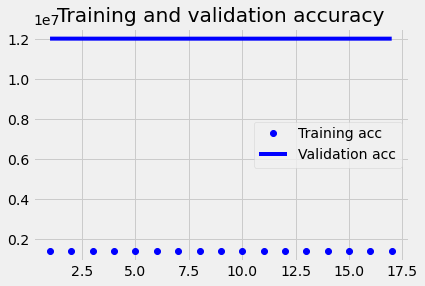

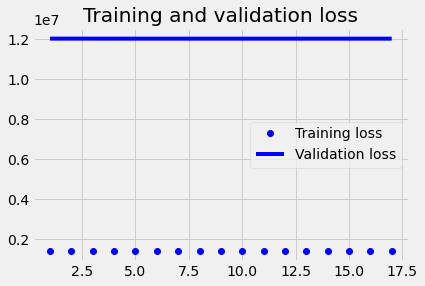

In [69]:
import matplotlib.pyplot as plt

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test

In [ ]:
# new_value_df.isnull().sum()

In [ ]:
# new_value_df['ds_level'] = new_value_df['ds_level'].fillna(1)
# new_value_df['country_code'] = new_value_df['country_code'].fillna(1)

In [ ]:
# new_value_df

In [ ]:
# new_value_df['Total visit'] = new_value_df['Total visit'].fillna(pd.pivot_table(user_df, index='c_time',values=['id'],aggfunc='count')[:46])